# EDA and data split for Propedia 

Positive data downloaded from http://bioinfo.dcc.ufmg.br/propedia/download

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = '/home/ec2-user/SageMaker/efs/data/Propedia'

In [3]:
os.path.dirname('/home/ec2-user/SageMaker/efs/data/Propedia/comlpex.csv')

'/home/ec2-user/SageMaker/efs/data/Propedia'

In [4]:
!ls -l {DATA_DIR}

total 2600656
-rw-rw-r-- 1 ec2-user ec2-user  11717752 Jun 23  2020 complex.csv
-rw-rw-r-- 1 ec2-user ec2-user 859605251 Jun 23  2020 complex.zip
-rw-rw-r-- 1 ec2-user ec2-user  19405862 Sep 14 16:42 full_09132022.csv
-rw-rw-r-- 1 ec2-user ec2-user    107077 Sep 14 15:30 non_canonical_peptides_in_propedia.csv
drwxr-xr-x 3 ec2-user ec2-user      6144 Sep 12 14:46 nr_aws_19k
-rw-rw-r-- 1 ec2-user ec2-user 796005006 Sep 12 22:04 nr_aws_19k_docks.tar
-rw-rw-r-- 1 ec2-user ec2-user   2118274 Jun 16  2020 peptide.fasta
-rw-rw-r-- 1 ec2-user ec2-user  42595167 Jun 23  2020 peptide.zip
drwxr-xr-x 3 ec2-user ec2-user      6144 Sep  6 23:11 propedia_aws_19k
-rw-rw-r-- 1 ec2-user ec2-user 812583503 Sep  7 19:46 propedia_aws_19k.tar
-rw-rw-r-- 1 ec2-user ec2-user   6240386 Jun 16  2020 receptor.fasta
-rw-rw-r-- 1 ec2-user ec2-user     15563 Sep 19 15:21 rmsd_refined_data_test.csv
-rw-rw-r-- 1 ec2-user ec2-user     76439 Sep 19 15:21 rmsd_refined_data_train.csv
drwxr-xr-x 3 ec2-user ec2-user      6

In [5]:
!wc -l {DATA_DIR}/complex.csv

19814 /home/ec2-user/SageMaker/efs/data/Propedia/complex.csv


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
complex_df = pd.read_csv(
    os.path.join(DATA_DIR, 'complex.csv'),
).rename(columns={
    'Receptor Chain': 'receptor_chain_id', 
    'Peptide Chain': 'ligand_chain_id'
})
print(complex_df.shape)
complex_df.head(10)

(19813, 30)


,PDB,Protein Name,Resolution,Classification,ligand_chain_id,Peptide Size,Peptide Sequence,Peptide Description,Peptide Organism,Peptide Interface Area,Peptide Molecular Weight,Peptide Aromaticity,Peptide Instability,Peptide Isoelectric Point,receptor_chain_id,Receptor Size,Receptor Sequence,Receptor Description,Receptor Organism,Receptor Interface Area,Receptor Molecular Weight,Receptor Aromaticity,Receptor Instability,Receptor Isoelectric Point,Sequence Cluster,Is Sequence Cluster Centroid,Interface Cluster,Is Interface Cluster Centroid,Binding Cluster,Is Binding Cluster Centroid
0,148l,A COVALENT ENZYME-SUBSTRATE INTERMEDIATE WITH ...,1.9,HYDROLASE/HYDROLASE SUBSTRATE,S,5,AXXXX,SUBSTRATE CLEAVED FROM CELL WALL OF ESCHERICHI...,Escherichia coli,151.70,-,0.0,-,5.57,E,163,MNIFEMLRIDEGLRLKIYKDTEGYYEIGIGHLLTKSPSLNAAKSEL...,T4 LYSOZYME,Escherichia virus T4,94.32,18515.99,0.09,37.30,9.66,NaN,NaN,NaN,NaN,NaN,NaN
1,1a07,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-MALONYL ...,2.2,COMPLEX (TRANSFERASE/PEPTIDE),C,3,XEX,"ACE-MALONYL TYR-GLU-(N,N-DIPENTYL AMINE)",-,104.76,-,0.0,-,4.00,A,105,SIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLS...,C-SRC TYROSINE KINASE,Homo sapiens,80.39,12039.45,0.11,40.24,9.07,NaN,NaN,NaN,NaN,NaN,NaN
2,1a07,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-MALONYL ...,2.2,COMPLEX (TRANSFERASE/PEPTIDE),D,3,XEX,"ACE-MALONYL TYR-GLU-(N,N-DIPENTYL AMINE)",-,106.41,-,0.0,-,4.00,B,104,IQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSV...,C-SRC TYROSINE KINASE,Homo sapiens,83.65,11952.37,0.12,40.53,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,1a08,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-DIFLUORO...,2.2,COMPLEX (TRANSFERASE/PEPTIDE),C,3,XEX,"ACE-DIFLUORO PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,107.21,-,0.0,-,4.00,A,105,SIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLS...,C-SRC TYROSINE KINASE,Homo sapiens,81.86,12039.45,0.11,40.24,9.07,NaN,NaN,NaN,NaN,NaN,NaN
4,1a08,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-DIFLUORO...,2.2,COMPLEX (TRANSFERASE/PEPTIDE),D,3,XEX,"ACE-DIFLUORO PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,104.76,-,0.0,-,4.00,B,104,IQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSV...,C-SRC TYROSINE KINASE,Homo sapiens,80.68,11952.37,0.12,40.53,9.08,NaN,NaN,NaN,NaN,NaN,NaN
5,1a09,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-FORMYL P...,2.0,COMPLEX (TRANSFERASE/PEPTIDE),C,3,XEX,"ACE-FORMYL PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,107.28,-,0.0,-,4.00,A,106,DSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCL...,C-SRC TYROSINE KINASE,Homo sapiens,82.50,12154.54,0.11,41.77,8.83,NaN,NaN,NaN,NaN,NaN,NaN
6,1a09,C-SRC (SH2 DOMAIN) COMPLEXED WITH ACE-FORMYL P...,2.0,COMPLEX (TRANSFERASE/PEPTIDE),D,3,XEX,"ACE-FORMYL PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,108.53,-,0.0,-,4.00,B,102,AEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSD...,C-SRC TYROSINE KINASE,Homo sapiens,82.06,11711.09,0.12,41.12,9.08,NaN,NaN,NaN,NaN,NaN,NaN
7,1a1a,C-SRC (SH2 DOMAIN WITH C188A MUTATION) COMPLEX...,2.0,COMPLEX (TRANSFERASE/PEPTIDE),C,3,XEX,"ACE-FORMYL PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,106.49,-,0.0,-,4.00,A,106,DSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYSL...,C-SRC TYROSINE KINASE,Homo sapiens,81.90,12138.47,0.11,39.95,8.96,NaN,NaN,NaN,NaN,NaN,NaN
8,1a1a,C-SRC (SH2 DOMAIN WITH C188A MUTATION) COMPLEX...,2.0,COMPLEX (TRANSFERASE/PEPTIDE),C,3,XEX,"ACE-FORMYL PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,15.13,-,0.0,-,4.00,B,102,AEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYSLSVSD...,C-SRC TYROSINE KINASE,Homo sapiens,15.60,11695.02,0.12,39.24,9.20,NaN,NaN,NaN,NaN,NaN,NaN
9,1a1a,C-SRC (SH2 DOMAIN WITH C188A MUTATION) COMPLEX...,2.0,COMPLEX (TRANSFERASE/PEPTIDE),D,3,XEX,"ACE-FORMYL PHOSPHOTYR-GLU-(N,N-DIPENTYL AMINE)",-,112.52,-,0.0,-,4.00,B,102,AEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYSLSVSD...,C-SRC TYROSINE KINASE,Homo sapiens,85.01,11695.02,0.12,39.24,9.20,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
complex_df['receptor_PDBID_chain'] = complex_df.apply(
    lambda row: row['PDB'] + '-' + row['receptor_chain_id'],
    axis=1
)
complex_df['ligand_PDBID_chain'] = complex_df.apply(
    lambda row: row['PDB'] + '-' + row['ligand_chain_id'],
    axis=1
)

In [9]:
print(complex_df.shape)
complex_df.count()

(19813, 32)


PDB                              19813
Protein Name                     19813
Resolution                       19177
Classification                   19813
ligand_chain_id                  19813
Peptide Size                     19813
Peptide Sequence                 19813
Peptide Description              19813
Peptide Organism                 19813
Peptide Interface Area           19813
Peptide Molecular Weight         19813
Peptide Aromaticity              19813
Peptide Instability              19813
Peptide Isoelectric Point        19813
receptor_chain_id                19813
Receptor Size                    19813
Receptor Sequence                19813
Receptor Description             19813
Receptor Organism                19813
Receptor Interface Area          19813
Receptor Molecular Weight        19813
Receptor Aromaticity             19813
Receptor Instability             19813
Receptor Isoelectric Point       19813
Sequence Cluster                  5971
Is Sequence Cluster Centr

In [10]:
# complex_df['Sequence Cluster'].value_counts()

In [11]:
complex_df['pdb_file'] = complex_df.apply(
    lambda row: f"structures/complex/{row['PDB']}_{row['ligand_chain_id']}_{row['receptor_chain_id']}.pdb",
    axis=1
)
complex_df['pdb_file'].head()

0    structures/complex/148l_S_E.pdb
1    structures/complex/1a07_C_A.pdb
2    structures/complex/1a07_D_B.pdb
3    structures/complex/1a08_C_A.pdb
4    structures/complex/1a08_D_B.pdb
Name: pdb_file, dtype: object

In [12]:
complex_df.nunique()

PDB                               8130
Protein Name                      7543
Resolution                         164
Classification                     752
ligand_chain_id                     62
Peptide Size                        49
Peptide Sequence                  7101
Peptide Description               5046
Peptide Organism                   405
Peptide Interface Area           18233
Peptide Molecular Weight          4486
Peptide Aromaticity                 47
Peptide Instability               3068
Peptide Isoelectric Point          626
receptor_chain_id                   52
Receptor Size                      653
Receptor Sequence                 9213
Receptor Description              3421
Receptor Organism                  399
Receptor Interface Area          17947
Receptor Molecular Weight         4381
Receptor Aromaticity                23
Receptor Instability              2587
Receptor Isoelectric Point         628
Sequence Cluster                  1845
Is Sequence Cluster Centr

In [13]:
# top categories for complexes
complex_df['Classification'].value_counts().head(20)

IMMUNE SYSTEM                         2367
HYDROLASE/HYDROLASE INHIBITOR         1484
HYDROLASE                             1374
TRANSCRIPTION                         1093
TRANSFERASE                            980
OXIDOREDUCTASE                         968
PHOTOSYNTHESIS                         838
PROTEIN BINDING                        660
SIGNALING PROTEIN                      470
SUGAR BINDING PROTEIN                  357
ELECTRON TRANSPORT, PHOTOSYNTHESIS     348
PEPTIDE BINDING PROTEIN                297
APOPTOSIS                              295
CELL CYCLE                             286
CELL ADHESION                          265
TRANSFERASE/TRANSFERASE INHIBITOR      264
HYDROLASE/ANTIBIOTIC                   245
PROTEIN TRANSPORT                      224
ISOMERASE/IMMUNOSUPPRESSANT            202
VIRAL PROTEIN                          201
Name: Classification, dtype: int64

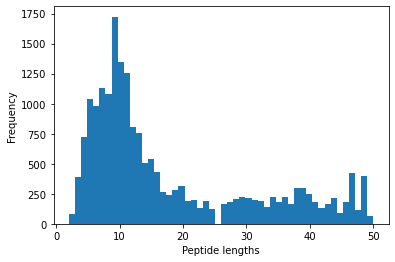

In [14]:
ax = complex_df['Peptide Size'].plot(kind='hist', bins=50);
ax.set(xlabel='Peptide lengths');

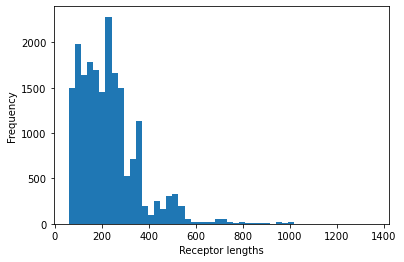

In [15]:
ax = complex_df['Receptor Size'].plot(kind='hist', bins=50);
ax.set(xlabel='Receptor lengths');

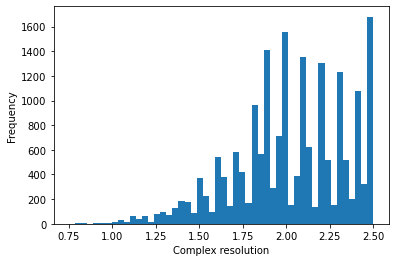

In [16]:
ax = complex_df['Resolution'].plot(kind='hist', bins=50);
ax.set(xlabel='Complex resolution');

## Load Jared's negative sets 

`docked_name`: receptor_chain_peptide_chain_refined.pdb

In [17]:
complex_df_neg1 = pd.read_csv(
    os.path.join(DATA_DIR, 'propedia_aws_19k/docked_data.csv'),
    index_col=0
).rename(columns={
    'ligand_chain': 'ligand_chain_id',
    'receptor_chain': 'receptor_chain_id'
})
# swap the two columns `ligand_PDBID`, `receptor_PDBID` as Jared made a mistake in his codes
complex_df_neg1 = complex_df_neg1.rename(columns={'ligand_PDBID': 'receptor_PDBID', 'receptor_PDBID': 'ligand_PDBID'})

complex_df_neg1['pdb_file'] = complex_df_neg1.apply(
    lambda row: f"propedia_aws_19k/docked_pdbs/{row['docked_name']}",
    axis=1
)
print(complex_df_neg1.shape)
complex_df_neg1.head()

(19021, 6)


,receptor_PDBID,ligand_PDBID,docked_name,ligand_chain_id,receptor_chain_id,pdb_file
0,1a2x,1ow6,1a2x_A_1ow6_F_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_1ow6_F_ref...
1,1a2x,1pcx,1a2x_A_1pcx_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_1pcx_B_ref...
2,1a2x,2b1j,1a2x_A_2b1j_D_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2b1j_D_ref...
3,1a2x,2b1n,1a2x_A_2b1n_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2b1n_B_ref...
4,1a2x,2iij,1a2x_A_2iij_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2iij_B_ref...


In [18]:
complex_df_neg2 = pd.read_csv(
    os.path.join(DATA_DIR, 'nr_aws_19k/docked_data.csv'),
    index_col=0
).rename(columns={
    'ligand_chain': 'ligand_chain_id',
    'receptor_chain': 'receptor_chain_id'
})

complex_df_neg2['pdb_file'] = complex_df_neg2.apply(
    lambda row: f"nr_aws_19k/docked_pdbs/{row['docked_name']}",
    axis=1
)
print(complex_df_neg2.shape)
complex_df_neg2.head()

(19301, 6)


,ligand_PDBID,receptor_PDBID,docked_name,ligand_chain_id,receptor_chain_id,pdb_file
0,1bm2,148l,148l_E_1bm2_L_refined.pdb,X,E,nr_aws_19k/docked_pdbs/148l_E_1bm2_L_refined.pdb
1,1mt7,1a07,1a07_A_1mt7_P_refined.pdb,X,A,nr_aws_19k/docked_pdbs/1a07_A_1mt7_P_refined.pdb
2,5kri,1a07,1a07_A_5kri_D_refined.pdb,X,A,nr_aws_19k/docked_pdbs/1a07_A_5kri_D_refined.pdb
3,1d5z,1a07,1a07_B_1d5z_D_refined.pdb,X,B,nr_aws_19k/docked_pdbs/1a07_B_1d5z_D_refined.pdb
4,6d0f,1a07,1a07_B_6d0f_C_refined.pdb,X,B,nr_aws_19k/docked_pdbs/1a07_B_6d0f_C_refined.pdb


In [19]:
complex_df_neg = pd.concat([complex_df_neg1, complex_df_neg2])
complex_df_neg.shape

(38322, 6)

In [20]:
# Get peptide sequence from the fasta file
complex_df_neg['receptor_PDBID_chain'] = complex_df_neg['docked_name'].map(
    lambda x: '-'.join(x.split('_')[0:2])
)
complex_df_neg['ligand_PDBID_chain'] = complex_df_neg['docked_name'].map(
    lambda x: '-'.join(x.split('_')[2:4])
)
complex_df_neg.head()

,receptor_PDBID,ligand_PDBID,docked_name,ligand_chain_id,receptor_chain_id,pdb_file,receptor_PDBID_chain,ligand_PDBID_chain
0,1a2x,1ow6,1a2x_A_1ow6_F_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_1ow6_F_ref...,1a2x-A,1ow6-F
1,1a2x,1pcx,1a2x_A_1pcx_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_1pcx_B_ref...,1a2x-A,1pcx-B
2,1a2x,2b1j,1a2x_A_2b1j_D_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2b1j_D_ref...,1a2x-A,2b1j-D
3,1a2x,2b1n,1a2x_A_2b1n_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2b1n_B_ref...,1a2x-A,2b1n-B
4,1a2x,2iij,1a2x_A_2iij_B_refined.pdb,X,A,propedia_aws_19k/docked_pdbs/1a2x_A_2iij_B_ref...,1a2x-A,2iij-B


In [21]:
# parse the peptide fasta file downloaded from Propedia
from Bio import SeqIO
d_fasta = SeqIO.to_dict(
    SeqIO.parse(os.path.join(DATA_DIR, "peptide.fasta"), "fasta")
)
print(len(d_fasta))

d_peptide_seqs = {}
for key, seq in d_fasta.items():
    ligand_pdbid_chain = '-'.join(key.split('|')[0].split('-')[:2])
    if ligand_pdbid_chain in d_peptide_seqs:
        # make sure ligand sequences are the same for the same PDBID chain
        assert d_peptide_seqs[ligand_pdbid_chain] == str(seq.seq)
    d_peptide_seqs[ligand_pdbid_chain] = str(seq.seq)

print('number of peptides:', len(d_peptide_seqs))

19813
number of peptides: 13618


In [22]:
d_fasta = SeqIO.to_dict(
    SeqIO.parse(os.path.join(DATA_DIR, "receptor.fasta"), "fasta")
)
print(len(d_fasta))

d_receptor_seqs = {}
for key, seq in d_fasta.items():
    pdb_id_chains = key.split('|')[0]
    receptor_pdbid_chain = pdb_id_chains.split('-')[0] + '-' + pdb_id_chains.split('-')[2]
    if receptor_pdbid_chain in d_receptor_seqs:
        # make sure sequences are the same for the same PDBID chain
        assert d_receptor_seqs[receptor_pdbid_chain] == str(seq.seq)
    d_receptor_seqs[receptor_pdbid_chain] = str(seq.seq)

print('number of receptors:', len(d_receptor_seqs))

19813
number of receptors: 14902


In [23]:
print('Number of unique peptide sequences:', len(set(d_peptide_seqs.values())))

Number of unique peptide sequences: 7101


In [24]:
print('Number of unique protein sequences:', len(set(d_receptor_seqs.values())))

Number of unique protein sequences: 9213


In [25]:
list(d_peptide_seqs.items())[:5]

[('148l-S', 'AXXXX'),
 ('1a07-C', 'XEX'),
 ('1a07-D', 'XEX'),
 ('1a08-C', 'XEX'),
 ('1a08-D', 'XEX')]

In [26]:
non_con_peptides = {pdb_id: seq for pdb_id, seq in d_peptide_seqs.items() if 'X' in seq}
print('number of non-canonical peptides:', len(non_con_peptides))

number of non-canonical peptides: 4822


In [27]:
# save to file
pd.Series(non_con_peptides).to_frame().rename(columns={0: 'sequence'})\
    .to_csv(os.path.join(DATA_DIR, 'non_canonical_peptides_in_propedia.csv'))

In [28]:
list(d_receptor_seqs.items())[:3]

[('148l-E',
  'MNIFEMLRIDEGLRLKIYKDTEGYYEIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKN'),
 ('1a07-A',
  'SIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCP'),
 ('1a07-B',
  'IQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCP')]

In [29]:
# add peptide sequence
complex_df_neg['Peptide Sequence'] = complex_df_neg['ligand_PDBID_chain']\
    .map(d_peptide_seqs)
# add receptor sequence
complex_df_neg['Receptor Sequence'] = complex_df_neg['receptor_PDBID_chain']\
    .map(d_receptor_seqs)

In [30]:
complex_df_neg.nunique()

receptor_PDBID           7566
ligand_PDBID             6979
docked_name             38320
ligand_chain_id             2
receptor_chain_id          51
pdb_file                38322
receptor_PDBID_chain    12907
ligand_PDBID_chain      10761
Peptide Sequence         5772
Receptor Sequence        8280
dtype: int64

In [31]:
set(complex_df.columns) & set(complex_df_neg.columns)

{'Peptide Sequence',
 'Receptor Sequence',
 'ligand_PDBID_chain',
 'ligand_chain_id',
 'pdb_file',
 'receptor_PDBID_chain',
 'receptor_chain_id'}

In [32]:
complex_df['label'] = 1
complex_df_neg['label'] = 0

shared_cols = list(set(complex_df.columns) & set(complex_df_neg.columns))

complex_df_comb = pd.concat([complex_df[shared_cols], complex_df_neg[shared_cols]]) 
print(complex_df_comb.shape)
complex_df_comb.head()

(58135, 8)


,ligand_chain_id,pdb_file,ligand_PDBID_chain,receptor_PDBID_chain,Peptide Sequence,receptor_chain_id,label,Receptor Sequence
0,S,structures/complex/148l_S_E.pdb,148l-S,148l-E,AXXXX,E,1,MNIFEMLRIDEGLRLKIYKDTEGYYEIGIGHLLTKSPSLNAAKSEL...
1,C,structures/complex/1a07_C_A.pdb,1a07-C,1a07-A,XEX,A,1,SIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLS...
2,D,structures/complex/1a07_D_B.pdb,1a07-D,1a07-B,XEX,B,1,IQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSV...
3,C,structures/complex/1a08_C_A.pdb,1a08-C,1a08-A,XEX,A,1,SIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLS...
4,D,structures/complex/1a08_D_B.pdb,1a08-D,1a08-B,XEX,B,1,IQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSV...


In [33]:
# !pip install matplotlib-venn
from matplotlib_venn import venn2

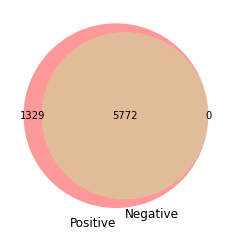

In [34]:
venn2(
    [set(complex_df['Peptide Sequence']),
    set(complex_df_neg['Peptide Sequence'])],
    ('Positive', 'Negative')
     );

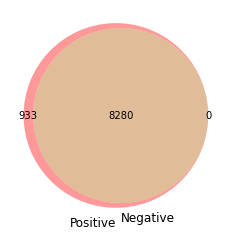

In [35]:
venn2(
    [set(complex_df['Receptor Sequence']),
    set(complex_df_neg['Receptor Sequence'])],
    ('Positive', 'Negative')
     );

In [36]:
pdb_set = set(complex_df['PDB'])
len(pdb_set)

8130

In [37]:
set(complex_df_neg['receptor_PDBID']).issubset(pdb_set)

True

In [38]:
set(complex_df_neg['ligand_PDBID']).issubset(pdb_set)

True

In [39]:
len(set(complex_df_neg['receptor_PDBID']) & set(complex_df_neg['ligand_PDBID']))

6492

In [40]:
# set(complex_df_neg['receptor_PDBID']) & set(complex_df_neg['ligand_PDBID'])

## Load sequence clustering results

In [41]:
seq_clusters_df = pd.read_csv(
    '/home/ec2-user/SageMaker/efs/results/sequence_clustering/combined_datasets_0.6Cov0_cluster.tsv',
    sep='\t',
    names=['cluster_center', 'member']
)
print(seq_clusters_df.shape)
print(seq_clusters_df.nunique())

(126084, 2)
cluster_center      6814
member            126084
dtype: int64


In [42]:
# parse the sequences
fasta = SeqIO.parse('/home/ec2-user/SageMaker/efs/results/sequence_clustering/combined_datasets_0.6Cov0_all_seqs.fasta', "fasta")
cluster_seqs = []
for item in fasta:
    seq = str(item.seq)
    if seq != '':
        cluster_seqs.append({'seq': seq, 'id': item.id})

len(cluster_seqs)

125431

In [43]:
cluster_seqs = pd.DataFrame(cluster_seqs,)
cluster_seqs.head()

,seq,id
0,TVAACANLPIVRGPCRAFIQLWAFDAVKGKCVLFPYGGCQGNGNKF...,4u30_Y
1,IHDFCLVSKVVGRCRASMPRWWYNVTDGSCQLFVYGGCDGNSNNYL...,4u32_X
2,QTEDYCLASNKVGRCRGSFPRWYYDPTEQICKSFVYGGCLGNKNNY...,4iso_B
3,MKHQHQHQHQHQHQMHQTEDYCLASNKVGRCRGSFPRWYYDPTEQI...,1yc0_I
4,QTEDYCLASNKVGRCRGSFPRWYYDPTEQICKSFVYGGCLGNKNNY...,4isl_B


In [44]:
cluster_seqs.nunique()

seq     29039
id     125431
dtype: int64

In [45]:
seq_clusters_df = seq_clusters_df.merge(
    cluster_seqs.set_index('id'),
    left_on='member',
    right_index=True,
    how='left'
).groupby('seq').first()
seq_clusters_df.count()

cluster_center    29039
member            29039
dtype: int64

In [46]:
complex_df_comb = complex_df_comb.merge(
    seq_clusters_df,
    left_on='Receptor Sequence',
    right_index=True
)
complex_df_comb.count()

ligand_chain_id         58135
pdb_file                58135
ligand_PDBID_chain      58135
receptor_PDBID_chain    58135
Peptide Sequence        58135
receptor_chain_id       58135
label                   58135
Receptor Sequence       58135
cluster_center          58135
member                  58135
dtype: int64

In [47]:
complex_df_comb = complex_df_comb.drop(['member'], axis=1)

In [48]:
complex_df_comb.nunique()

ligand_chain_id            62
pdb_file                58135
ligand_PDBID_chain      13618
receptor_PDBID_chain    14902
Peptide Sequence         7101
receptor_chain_id          52
label                       2
Receptor Sequence        9213
cluster_center           1844
dtype: int64

In [49]:
complex_df_comb['cluster_center'].value_counts()
## Top clusters in Propedia:
# 1bii_A: MHC CLASS I H-2DD
# 5to3: Prothrombin,Thrombomodulin, membrane protein reduces blood coagulation
# 7ljr_S: Fab DH1043 heavy chain

1bii_A                                                             2245
5to3-A-B|Prothrombin,Thrombomodulin|Prothrombin|IVEGSDAEIG[...]    1318
7ljr_S                                                              887
3q95-D-B|Estrogen                                                   852
1lxf-I-C|TROPONIN                                                   784
                                                                   ... 
5xxb_J                                                                1
1jmt-B-A|SPLICING                                                     1
3qks-C-A|DNA                                                          1
3to6-B-A|Histone                                                      1
2v2f-A-F|PENICILLIN                                                   1
Name: cluster_center, Length: 1844, dtype: int64

## Screen all pdb files are parsable 

In [50]:
complex_df_comb.to_csv(
    os.path.join(DATA_DIR, 'full_09132022.csv')
)

In [51]:
from ppi.data import PDBComplexDataset
from ppi.data_utils import NoncanonicalComplexFeaturizer, get_residue_featurizer

In [53]:
residue_featurizer = get_residue_featurizer('MACCS')
featurizer = NoncanonicalComplexFeaturizer(residue_featurizer)
full_dataset = PDBComplexDataset(
    complex_df_comb,
    DATA_DIR,
    featurizer=featurizer,
    
)
len(full_dataset)

58135

In [54]:
from joblib import Parallel, delayed
from tqdm import tqdm
def parse_and_featurize(idx, dataset):
    try:
        g = dataset[idx]
        return 0
    except:
        return 1


In [56]:
flags = Parallel(n_jobs=-1, backend='loky')(delayed(parse_and_featurize)(idx, full_dataset) for idx in tqdm(range(len(full_dataset))))

100%|██████████| 58135/58135 [1:08:58<00:00, 14.05it/s]


In [57]:
print('number of pdb files with parsing error:', sum(flags))

number of pdb files with parsing error: 1353


In [59]:
complex_df_comb['has_parse_and_featurize_error'] = flags
# len(flags)

In [60]:
complex_df_comb.to_csv(
    os.path.join(DATA_DIR, 'full_09132022.csv')
)

In [65]:
error_mask = complex_df_comb['has_parse_and_featurize_error']==1
complex_df_comb.loc[
    error_mask,'label'].value_counts()

1    1073
0     280
Name: label, dtype: int64

In [66]:
complex_df_comb.loc[error_mask].nunique()

ligand_PDBID_chain                763
receptor_chain_id                  31
label                               2
Receptor Sequence                 189
ligand_chain_id                    39
receptor_PDBID_chain              301
pdb_file                         1353
Peptide Sequence                  435
cluster_center                     72
has_parse_and_featurize_error       1
dtype: int64

In [68]:
# remove rows with errors 
complex_df_comb = complex_df_comb.loc[~error_mask]
complex_df_comb.shape

(56782, 10)

## Train/test split 

In [69]:
from sklearn import model_selection

In [70]:
splitter = model_selection.StratifiedGroupKFold(
    n_splits=5,
#     shuffle=True,
#     random_state=42
)

for train_idxs, test_idxs in splitter.split(
    complex_df_comb, 
    y=complex_df_comb['label'],
    groups=complex_df_comb['cluster_center']
):
    print('Train/test ratio:', len(train_idxs)/len(test_idxs))
    print('Train pos label ratio:',
          complex_df_comb['label'].iloc[train_idxs].mean()
         )
    print('Test pos label ratio:',
          complex_df_comb['label'].iloc[test_idxs].mean()
         )


Train/test ratio: 4.001056896248018
Train pos label ratio: 0.330060755481201
Test pos label ratio: 0.3299277787563854
Train/test ratio: 4.0014974015678675
Train pos label ratio: 0.330075502432367
Test pos label ratio: 0.32986875715669867
Train/test ratio: 3.9953373801354797
Train pos label ratio: 0.32997908180116703
Test pos label ratio: 0.3302542447435559
Train/test ratio: 4.0014974015678675
Train pos label ratio: 0.3300094653195096
Test pos label ratio: 0.33013300449220473
Train/test ratio: 4.000616468516072
Train pos label ratio: 0.33004600788077576
Test pos label ratio: 0.3299867899603699


In [71]:
train_idxs.shape, test_idxs.shape

((45427,), (11355,))

In [72]:
# !ls {DATA_DIR}

In [76]:
complex_df_comb.iloc[train_idxs].to_csv(
    os.path.join(DATA_DIR, 'train_full.csv')
)
complex_df_comb.iloc[test_idxs].to_csv(
    os.path.join(DATA_DIR, 'test_full.csv')
)

In [79]:
# subsample to make smaller versions of the dataset
complex_df_comb.iloc[train_idxs].sample(
    frac=0.1,
    random_state=42
).to_csv(
    os.path.join(DATA_DIR, 'train_small.csv')
)

complex_df_comb.iloc[test_idxs].sample(
    frac=0.1,
    random_state=42
).to_csv(
    os.path.join(DATA_DIR, 'test_small.csv')
)

## Top receptor clusters
- Training set:
    + [1bii_A](https://www.rcsb.org/3d-view/1BII): MHC class I 
    + [7ljr_S](https://www.rcsb.org/3d-view/7LJR): fragment antigen-binding regions (Fab) dh1043 heavy chain
    + [3q95-D-B|Estrogen](https://www.rcsb.org/3d-view/3q95)
    + [1lxf-I-C|TROPONIN](https://www.rcsb.org/3d-view/1lxf): integral to muscle contraction in skeletal muscle and cardiac muscle
    + [5yax-C-B|scFv1](https://www.rcsb.org/3d-view/5yax): single chain fragment variable(scFv1) human neutralizing antibody
    
- Test set:
    + [5to3-A-B|Prothrombin,Thrombomodulin|Prothrombin](https://www.rcsb.org/3d-view/5TO3): integral membrane protein expressed on the surface of endothelial cells and serves as a cofactor for thrombin. It reduces blood coagulation.
    + [6f08-N-J|14-3-3](https://www.rcsb.org/3d-view/6f08): central hub protein for many signal transduction pathways. 14-3-3ζ is a major regulator of apoptotic pathways.
    + [3rdq-A](https://www.rcsb.org/3d-view/3RDQ): Streptavidin, from the bacterium Streptomyces avidinii, have an extraordinarily high affinity for biotin.
    + [2jet-A-C|CHYMOTRYPSINOGEN](https://www.rcsb.org/3d-view/2JET): an inactive precursor of chymotrypsin, a digestive enzyme which breaks proteins down into smaller peptides. 
    + [1q1s-A-C|Importin](https://www.rcsb.org/3d-view/1q1s): a type of karyopherin that transports protein molecules from the cell's cytoplasm to the nucleus.

In [80]:
# top clusters in training set:
complex_df_comb.iloc[train_idxs]['cluster_center'].value_counts()

1bii_A                                   2228
7ljr_S                                    887
3q95-D-B|Estrogen                         852
1lxf-I-C|TROPONIN                         784
5yax-C-B|scFv1                            629
                                         ... 
2oq1-B-A|Tyrosine-protein                   1
3t62_D                                      1
3qks-C-A|DNA                                1
2mpm-B-A|Eotaxin|CCR3|GPASVPTTCC[...]       1
5kq1_E                                      1
Name: cluster_center, Length: 1434, dtype: int64

In [81]:
# top clusters in test set:
complex_df_comb.iloc[test_idxs]['cluster_center'].value_counts()

5to3-A-B|Prothrombin,Thrombomodulin|Prothrombin|IVEGSDAEIG[...]    1309
6f08-N-J|14-3-3                                                     556
3rdq-A                                                              341
2jet-A-C|CHYMOTRYPSINOGEN                                           283
1q1s-A-C|Importin                                                   224
                                                                   ... 
1jmt-B-A|SPLICING                                                     1
5kds-G-A|F5/8                                                         1
2j0s-T-A|ATP-DEPENDENT                                                1
6xte-B-A|Importin-5|antipain|AMAAAEQQQF[...]                          1
1fo0-P-B|PROTEIN                                                      1
Name: cluster_center, Length: 392, dtype: int64

In [75]:
complex_df_comb.loc[complex_df_comb['label']==1, 'pdb_file'].nunique()

18740

/home/ec2-user/SageMaker/ppi-model/ppi/data_utils/residue_featurizers.py:50: UserWarning: The given buffer is not writable, and PyTorch does not support non-writable tensors. This means you can write to the underlying (supposedly non-writable) buffer using the tensor. You may want to copy the buffer to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272172048/work/torch/csrc/autograd/python_torch_functions_manual.cpp:489.)
  fps_vec = torch.frombuffer(
/home/ec2-user/SageMaker/ppi-model/ppi/data_utils/residue_featurizers.py:50: UserWarning: The given buffer is not writable, and PyTorch does not support non-writable tensors. This means you can write to the underlying (supposedly non-writable) buffer using the tensor. You may want to copy the buffer to protect its data or make it writable before converting it to a tensor. This type of war

## Load `selfdock` dataset

In [211]:
train_sm_df = pd.read_csv(
    os.path.join(DATA_DIR, 'train_small.csv'),
    index_col=0    
)
test_sm_df = pd.read_csv(
    os.path.join(DATA_DIR, 'test_small.csv'),
    index_col=0
)
print(train_sm_df.shape, test_sm_df.shape)

(4543, 10) (1136, 10)


In [212]:
test_sm_df.head()

,ligand_PDBID_chain,receptor_chain_id,label,Receptor Sequence,ligand_chain_id,receptor_PDBID_chain,pdb_file,Peptide Sequence,cluster_center,has_parse_and_featurize_error
203,6ef5-Q,H,0,IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...,X,1bcu-H,nr_aws_19k/docked_pdbs/1bcu_H_6ef5_Q_refined.pdb,RSLXAPG,"5to3-A-B|Prothrombin,Thrombomodulin|Prothrombi...",0
18865,5dxg-C,E,0,GAMGSMERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSXEER...,X,6qzr-E,nr_aws_19k/docked_pdbs/6qzr_E_5dxg_C_refined.pdb,HKXLHRXLQDSX,6f08-N-J|14-3-3,0
8111,3u9q-B,A,1,SADLRALAKHLYDSYIKSFPLTKAKARAILTGKTTDKSPFVIYDMN...,B,3u9q-A,structures/complex/3u9q_B_A.pdb,SLLKKLLLA,1k74_D,0
1522,2ovr-C,A,0,GSPGIRLGSSEDNFARFVCKNNGVLFENQLLQIGLKSEFRQNLGRM...,X,1kyu-A,propedia_aws_19k/docked_pdbs/1kyu_A_2ovr_C_ref...,SLIPPDK,1w80-P-A|ADAPTER-RELATED,0
9185,5h7h-C,B,0,APPQEQKQMLGERLFPLIQAMHPTLAGKITGMLLEIDNSELLHMLE...,X,3kus-B,propedia_aws_19k/docked_pdbs/3kus_B_5h7h_C_ref...,WRVP,1jgn-B-A|polyadenylate-binding,0


In [213]:
train_df['label'].value_counts()

0    3034
1    1509
Name: label, dtype: int64

In [214]:
test_df['label'].value_counts()

0    775
1    361
Name: label, dtype: int64

In [215]:
rmsd_train = pd.read_csv(
    os.path.join(DATA_DIR, 'rmsd_refined_data_train.csv'),
    index_col='docked_name'
)

rmsd_test = pd.read_csv(
    os.path.join(DATA_DIR, 'rmsd_refined_data_test.csv'),
    index_col='docked_name'
)
rmsd_train.head()

,Unnamed: 0,ligand_PDBID_chain,receptor_PDBID_chain,rmsd
docked_name,,,,
5iqm_A_5iqm_F_refined.pdb,0,5iqm_F,5iqm_A,3.10067
6jbk_G_6jbk_B_refined.pdb,1,6jbk_B,6jbk_G,4.82671
2gzd_B_2gzd_D_refined.pdb,2,2gzd_D,2gzd_B,1.49847
5mer_A_5mer_C_refined.pdb,3,5mer_C,5mer_A,0.36982
1rmh_B_1rmh_C_refined.pdb,4,1rmh_C,1rmh_B,0.27776


In [216]:
selfdock_train_df = pd.read_csv(
    os.path.join(DATA_DIR, 'selfdock_train_aws/docked_data.csv'),
    index_col=0
).rename(columns={
    'ligand_chain': 'ligand_chain_id',
    'receptor_chain': 'receptor_chain_id',
    'ligand_PDBID' : 'ligand_PDBID_chain',
    'receptor_PDBID' : 'receptor_PDBID_chain',    
}).merge(
    rmsd_train[['rmsd']],
    left_on='docked_name',
    right_index=True,
    how='left'
)
selfdock_train_df['ligand_PDBID_chain'] = selfdock_train_df.apply(
    lambda row: row['ligand_PDBID_chain'] + '-' + row['docked_name'].split('_')[3],
    axis=1
)
selfdock_train_df['receptor_PDBID_chain'] = selfdock_train_df.apply(
    lambda row: row['receptor_PDBID_chain'] + '-' + row['docked_name'].split('_')[1],
    axis=1
)


selfdock_train_df['label'] = 1
selfdock_train_df['pdb_file'] = selfdock_train_df['docked_name'].map(
    lambda x: f'selfdock_train_aws/docked_pdbs/{x}'
)

selfdock_test_df = pd.read_csv(
    os.path.join(DATA_DIR, 'selfdock_test_aws/docked_data.csv'),
    index_col=0
).rename(columns={
    'ligand_chain': 'ligand_chain_id',
    'receptor_chain': 'receptor_chain_id',
    'ligand_PDBID' : 'ligand_PDBID_chain',
    'receptor_PDBID' : 'receptor_PDBID_chain',
}).merge(
    rmsd_test[['rmsd']],
    left_on='docked_name',
    right_index=True,
    how='left'
)

selfdock_test_df['ligand_PDBID_chain'] = selfdock_test_df.apply(
    lambda row: row['ligand_PDBID_chain'] + '-' + row['docked_name'].split('_')[3],
    axis=1    
)
selfdock_test_df['receptor_PDBID_chain'] = selfdock_test_df.apply(
    lambda row: row['receptor_PDBID_chain'] + '-' + row['docked_name'].split('_')[1],
    axis=1    
)


selfdock_test_df['label'] = 1
selfdock_test_df['pdb_file'] = selfdock_test_df['docked_name'].map(
    lambda x: f'selfdock_test_aws/docked_pdbs/{x}'
)


print(selfdock_train_df.shape, selfdock_test_df.shape)

(1469, 8) (355, 8)


In [217]:
selfdock_test_df.head()

,ligand_PDBID_chain,receptor_PDBID_chain,docked_name,ligand_chain_id,receptor_chain_id,rmsd,label,pdb_file
0,1a2c-L,1a2c-H,1a2c_H_1a2c_L_refined.pdb,X,H,0.00000,1,selfdock_test_aws/docked_pdbs/1a2c_H_1a2c_L_re...
1,1a5g-L,1a5g-H,1a5g_H_1a5g_L_refined.pdb,X,H,0.86906,1,selfdock_test_aws/docked_pdbs/1a5g_H_1a5g_L_re...
2,1a61-L,1a61-H,1a61_H_1a61_L_refined.pdb,X,H,0.61090,1,selfdock_test_aws/docked_pdbs/1a61_H_1a61_L_re...
3,1ay6-L,1ay6-H,1ay6_H_1ay6_L_refined.pdb,X,H,1.10492,1,selfdock_test_aws/docked_pdbs/1ay6_H_1ay6_L_re...
4,1bb0-C,1bb0-B,1bb0_B_1bb0_C_refined.pdb,X,B,0.76091,1,selfdock_test_aws/docked_pdbs/1bb0_B_1bb0_C_re...


In [218]:
selfdock_test_df.head()

,ligand_PDBID_chain,receptor_PDBID_chain,docked_name,ligand_chain_id,receptor_chain_id,rmsd,label,pdb_file
0,1a2c-L,1a2c-H,1a2c_H_1a2c_L_refined.pdb,X,H,0.00000,1,selfdock_test_aws/docked_pdbs/1a2c_H_1a2c_L_re...
1,1a5g-L,1a5g-H,1a5g_H_1a5g_L_refined.pdb,X,H,0.86906,1,selfdock_test_aws/docked_pdbs/1a5g_H_1a5g_L_re...
2,1a61-L,1a61-H,1a61_H_1a61_L_refined.pdb,X,H,0.61090,1,selfdock_test_aws/docked_pdbs/1a61_H_1a61_L_re...
3,1ay6-L,1ay6-H,1ay6_H_1ay6_L_refined.pdb,X,H,1.10492,1,selfdock_test_aws/docked_pdbs/1ay6_H_1ay6_L_re...
4,1bb0-C,1bb0-B,1bb0_B_1bb0_C_refined.pdb,X,B,0.76091,1,selfdock_test_aws/docked_pdbs/1bb0_B_1bb0_C_re...


In [219]:
# selfdock_train_df.rmsd.describe()

In [220]:
# selfdock_test_df.rmsd.describe()

In [221]:
# replace positive rows in train_sm_df and test_sm_df
train_sm_df = train_sm_df.loc[train_sm_df['label'] == 0]
train_sm_df = pd.concat([train_sm_df, selfdock_train_df])\
    .sample(frac=1, random_state=42)


test_sm_df = test_sm_df.loc[test_sm_df['label'] == 0]
test_sm_df = pd.concat([test_sm_df, selfdock_test_df])

print(train_sm_df.shape, test_sm_df.shape)

(4503, 12) (1130, 12)


In [222]:
train_sm_df.to_csv(
    os.path.join(DATA_DIR, 'train_small_selfdock.csv')
)
test_sm_df.to_csv(
    os.path.join(DATA_DIR, 'test_small_selfdock.csv')
)

In [223]:
train_sm_df.count()

ligand_PDBID_chain               4503
receptor_chain_id                4503
label                            4503
Receptor Sequence                3034
ligand_chain_id                  4503
receptor_PDBID_chain             4503
pdb_file                         4503
Peptide Sequence                 3034
cluster_center                   3034
has_parse_and_featurize_error    3034
docked_name                      1469
rmsd                             1469
dtype: int64

## Check individual complex structures
1. https://www.rcsb.org/3d-sequence/148L: peptide sequence is AEKA on PDB
2. https://www.rcsb.org/3d-sequence/1a07: peptide sequence is XYEX on PDB
3. https://www.rcsb.org/3d-sequence/1a08: peptide sequence is XYEX on PDB
4. https://www.rcsb.org/3d-sequence/8kme: peptide sequence is XFXKLPX on PDB

In [56]:
from ppi.data_utils import parse_pdb_structure, extract_coords, SloppyStructureBuilder
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import is_aa
from rdkit import Chem

In [57]:
from ppi.data_utils import contact_map_utils as utils

In [58]:
from IPython.display import display

In [59]:
# !ls -lh {DATA_DIR}/structures/complex/8kme* | head

In [60]:
# pdb_id = '148l_S_E'
# pdb_id = '1a07_C_A'
# pdb_id = '8kme_4_2'
pdb_id = '148l_S_E'

pdb_parser = PDBParser(
    QUIET=True,
    PERMISSIVE=True,
#     structure_builder=SloppyStructureBuilder(),
)

structure = pdb_parser.get_structure(
    pdb_id, 
    os.path.join(DATA_DIR, 'structures/complex', f'{pdb_id}.pdb')                 
)

In [61]:
recs = extract_coords(structure)
recs.keys()

dict_keys(['E', 'S'])

In [62]:
for key in recs:
    print(key)
    print(recs[key]['seq'])

E
MNIFEMLRIDEGLRLKIYKDTEGYYEIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKN
S
AXXX


In [63]:
# peptide_chain_id = 'C'
peptide_chain_id = 'S'
# recs[peptide_chain_id]['coords']

In [64]:
# utils.residue_to_mol(chain)

<Residue ALA het=  resseq=166 icode= >


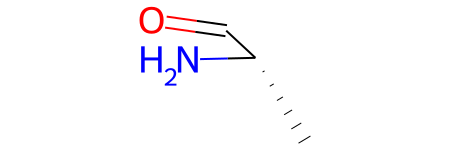

<Residue FGA het=H_FGA resseq=167 icode= >


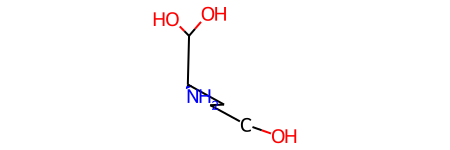

<Residue API het=H_API resseq=169 icode= >


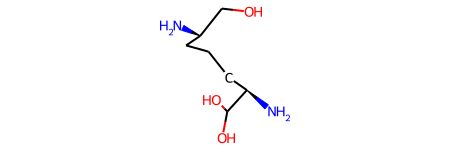

<Residue DAL het=H_DAL resseq=170 icode= >


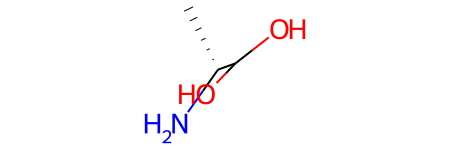

<Residue MUB het=H_MUB resseq=165 icode= >


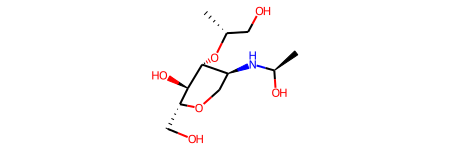

In [65]:
for chain in structure.get_chains():
    if chain.id == peptide_chain_id:
        break
# try to convert peptide residues to rdkit objects
peptide_coords = []
for res in chain.get_residues():
#     if is_aa(res):
#     print(res, 'is AA?', is_aa(res))
    print(res)
    peptide_coords.append(utils.get_atom_coords(res))
    res_mol = utils.residue_to_mol(res)
    display(res_mol)

### Check negative pdb files

In [66]:
idx = 1
print(complex_df_neg.iloc[idx])
pdb_id = complex_df_neg['docked_name'].iloc[idx]
peptide_chain_id = complex_df_neg['ligand_chain'].iloc[idx]

pdb_parser = PDBParser(
    QUIET=True,
    PERMISSIVE=True,
#     structure_builder=SloppyStructureBuilder(),
)

structure = pdb_parser.get_structure(
    pdb_id, 
    os.path.join(DATA_DIR, 'propedia_aws_19k/docked_pdbs', pdb_id)                 
)

receptor_PDBID                                                       1a2x
ligand_PDBID                                                         1pcx
docked_name                                     1a2x_A_1pcx_B_refined.pdb
ligand_chain                                                            X
receptor_chain                                                          A
pdb_file                propedia_aws_19k/docked_pdbs/1a2x_A_1pcx_B_ref...
receptor_PDBID_chain                                               1a2x-A
ligand_PDBID_chain                                                 1pcx-B
Peptide Sequence                                                 LASLESQS
Receptor Sequence       DQQAEARSYLSEEMIAEFKAAFDMFDADGGGDISVKELGTVMRMLG...
label                                                                   0
Name: 1, dtype: object


In [67]:
recs = extract_coords(structure)
recs.keys()

dict_keys(['A', 'X'])

In [68]:
for key in recs:
    print(key)
    print(recs[key]['seq'])

A
DQQAEARSYLSEEMIAEFKAAFDMFDADGGGDISVKELGTVMRMLGQTPTKEELDAIIEEVDEDGSGTIDFEEFLVMMVRQMKEDAKGKSEEELAECFRIFDRNADGYIDAEELAEIFRASGEHVTDEEIESLMKDGDKNNDGRIDFDEFLKMMEGVQ
X
ESQXLSAL


In [69]:
# recs['X']

<Residue GLU het=  resseq=5 icode= > is AA? True
N[C@H](C=O)CCC(=O)O


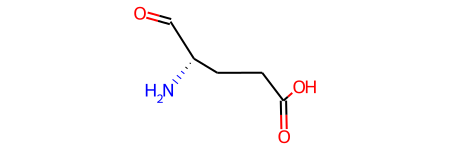

<Residue SER het=  resseq=6 icode= > is AA? True
N[C@H](C=O)CO


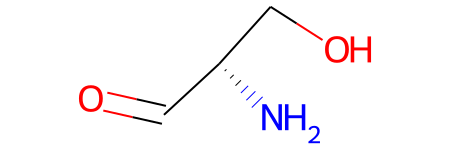

<Residue GLN het=  resseq=7 icode= > is AA? True
NC(=O)CC[C@H](N)C=O


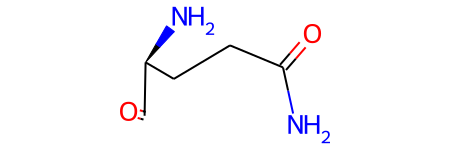

<Residue UNK het=H_UNK resseq=8 icode= > is AA? True
CN.O


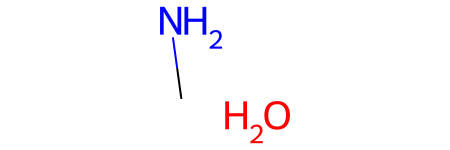

<Residue LEU het=  resseq=4 icode= > is AA? True
CC(C)C[C@H](N)C=O


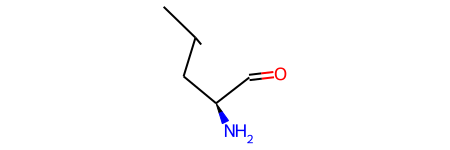

<Residue SER het=  resseq=3 icode= > is AA? True
N[C@H](C=O)CO


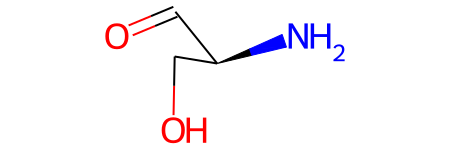

<Residue ALA het=  resseq=2 icode= > is AA? True
C[C@H](N)C=O


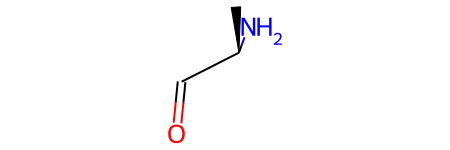

<Residue LEU het=  resseq=1 icode= > is AA? True
CC(C)C[C@H](N)C=O


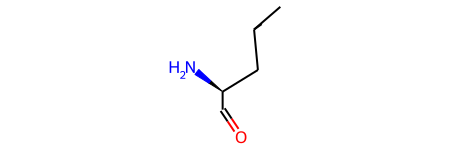

In [70]:
for chain in structure.get_chains():
    if chain.id == peptide_chain_id:
        break

# try to convert peptide residues to rdkit objects
peptide_coords = []
for res in chain.get_residues():
    print(res, 'is AA?', is_aa(res))
    peptide_coords.append(utils.get_atom_coords(res))
    res_mol = utils.residue_to_mol(res)
    print(Chem.MolToSmiles(res_mol))
    display(res_mol)        

In [71]:
print(res)
len([atom for atom in res.get_atoms()])

<Residue LEU het=  resseq=1 icode= >


10

In [72]:
import matplotlib

def plot_backbone(rec: dict, ax):
    '''
    3d plot for the backbone atoms from a chain.
    '''
    coords = np.asarray(rec['coords'])
    atoms = ["N", "CA", "C", "O"]
    for i, atom in enumerate(atoms):
        ax.scatter(coords[:, i, 0],
                   coords[:, i, 1],
                   coords[:, i, 2],
                   label='%s:%s' % (rec['name'], atom)
                  );

    # connect backbone atoms sequentially
    coords_stacked = coords.reshape(-1, 3)
    N_atoms = coords_stacked.shape[0]
    edge_pos = np.array([(coords_stacked[u], coords_stacked[u+1]) \
                         for u in range(N_atoms-1)])

    # Plot the edges
    for vizedge in edge_pos:
        ax.plot(*vizedge.T, color="tab:gray")

    return ax 

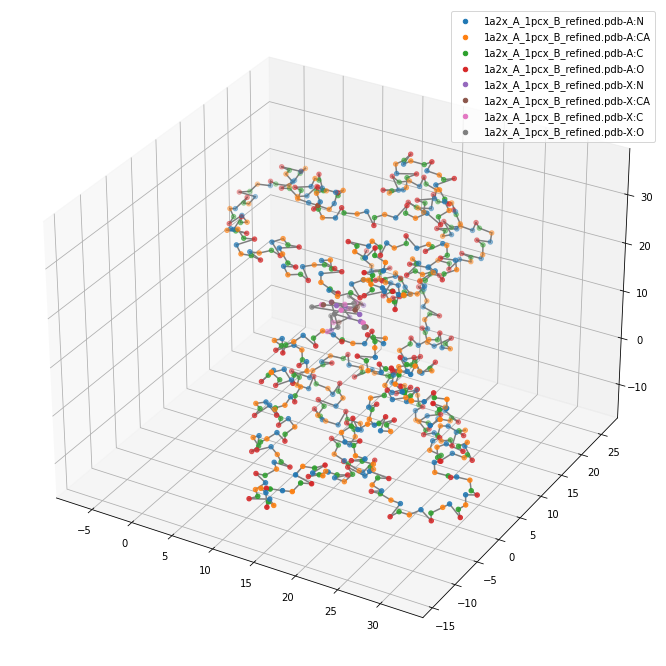

In [73]:
# Visualize 4 key atoms across amino acid residues in the pair of proteins
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for chain_id in recs:
    ax = plot_backbone(recs[chain_id], ax)
    
ax.legend()